In [1]:
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
%matplotlib inline

from sem3d.data import get_imgs, get_pairs
from sem3d.rectification import rectify, get_filtered_kp
from sem3d.plots import plot_epipolar_lines, plot_disp, plot_disp_trends

In [2]:
def plot_rect_stats(img1, img2, q1, q2, npoints=10):
    plot_epipolar_lines(img1, img2, q1, q2, npoints=npoints)
    plot_disp(q1, q2)
    plot_disp_trends(q1, q2)
    
def rect_stats( img1, img2, feat="sift",
                intensity_threshold = 50,
                residual_threshold  = .1,
                coef_threshold=.7,
                dist_threshold=30,
                min_samples=5,
                x_margin=2, npoints=10):
    """
    """
    q1, q2 = get_filtered_kp(img1, img2, feat=feat, 
                 intensity_threshold = intensity_threshold,
                 residual_threshold = .1,
                 coef_threshold = coef_threshold,
                 dist_threshold = dist_threshold,
                 min_samples = min_samples)

    plot_rect_stats(img1, img2, q1, q2, npoints)
    
def save_rectified(img1, img2, k1, k2, dataset):
    """
    """
    folder = f"../data/Rectified/{dataset}"
    cv2.imwrite(f"{folder}/{k1}_{k2}_left.jpg", img1)
    cv2.imwrite(f"{folder}/{k1}_{k2}_right.jpg", img2)
    
def test_correctness(img1, img2):
    """
        TODO
    """
    return True

### Illustration of the images

In [3]:
dataset = "Pollen"
imgs = get_imgs(dataset)
# Filter the bottom of the Pollen images
# Other datasets will need other filtering.
imgs = {k:v[:600] for k,v in imgs.items()}

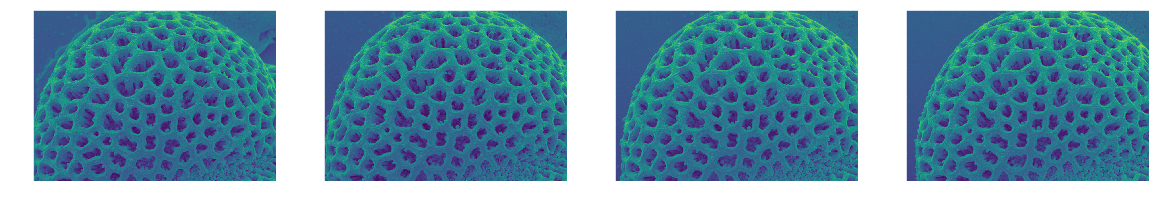

In [4]:
keys = list(sorted(imgs.keys()))
fig, ax = plt.subplots(1,len(keys), figsize=(5*len(keys), 5))
for i,k in enumerate(keys):
    ax[i].imshow(imgs[k])

### Statistics of the first pair before rectification

In [5]:
img1, img2 = imgs[keys[0]], imgs[keys[-1]]

In [6]:
params = {  "feat"                : "sift",
            "intensity_threshold" : 50,
            "residual_threshold"  : .1,
            "coef_threshold"      : .7,
            "dist_threshold"      : 30,
            "min_samples"         : 5,
            "x_margin"            : 2}

In [ ]:
rect_stats(img1, img2, **params)

### Rectification statistics

In [ ]:
img1, img2, q1, q2 = rectify(img1, img2, **params)

plot_epipolar_lines(img1, img2, q1, q2, npoints=10);
plot_disp(q1, q2);
plot_disp_trends(q1, q2);

### Statistics after rectification

In [ ]:
rect_stats(img1, img2, **params)

### Saving recitified image pairs

In [ ]:
# Create directory if it does not exist
folder = f"../data/Rectified/{dataset}"
if not os.path.isdir(folder):
    os.makedirs(folder)

In [ ]:
# Save one pair
save_rectified(img1, img2, k1, k2, dataset)

In [ ]:
# Save all pairs
for k1,k2 in get_pairs(keys):
    img1, img2 = imgs[k1], imgs[k2]
    img1, img2, q1, q2 = rectify(img1, img2)
    if test_correctness(img1, img2):
        save_rectified(img1, img2, k1, k2, dataset)